In [222]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

from sklearn import linear_model

In [223]:
# Reading the csv file for 'worldometer_snapshots_April18_to_May18'
ds = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
ds

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [224]:
# Initial shape of dataset
ds.shape

(6603, 9)

In [225]:
# Reading the csv file for 'population_structure_by_age_per_contry'
ds1 = pd.read_csv('population_structure_by_age_per_contry.csv')
ds1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [226]:
ds1.shape

(213, 4)

In [227]:
ds.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [228]:
ds1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [229]:
def remove_duplicate(data):
    # Removing the duplicate rows from the dataset

    print ('Shape of dataset before removing duplicates: ', data.shape)
    # Dropping the duplicate rows
    data = data.drop_duplicates(keep='first')
    print ('Shape of dataset after removing duplicates: ', data.shape)
    return

# Removing duplicates

In [230]:
remove_duplicate(ds)

Shape of dataset before removing duplicates:  (6603, 9)
Shape of dataset after removing duplicates:  (6603, 9)


In [231]:
remove_duplicate(ds1)

Shape of dataset before removing duplicates:  (213, 4)
Shape of dataset after removing duplicates:  (213, 4)


In [232]:
ds.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [233]:
ds1.columns

Index(['Country', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

# checking the count of unique country for both the datasets

In [234]:
ds['Country'].nunique()

213

In [235]:
ds1['Country'].nunique()

213

# Creating the needed columns

In [236]:
ds['Fraction age 0-14 years'] = 0
ds['Fraction age 15-64 years'] = 0
ds['Fraction age 65+ years'] = 0

In [237]:
ds.dtypes

Date                         object
Country                      object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years       int64
Fraction age 15-64 years      int64
Fraction age 65+ years        int64
dtype: object

# Converting dataframes to dictionary

In [238]:
# population_structure_by_age_per_contry
ds2 = ds1.to_dict()

In [239]:
# worldometer_snapshots_April18_to_May18
ds3 = ds.to_dict()

In [240]:
ds3

{'Date': {0: '2020-04-18',
  1: '2020-04-18',
  2: '2020-04-18',
  3: '2020-04-18',
  4: '2020-04-18',
  5: '2020-04-18',
  6: '2020-04-18',
  7: '2020-04-18',
  8: '2020-04-18',
  9: '2020-04-18',
  10: '2020-04-18',
  11: '2020-04-18',
  12: '2020-04-18',
  13: '2020-04-18',
  14: '2020-04-18',
  15: '2020-04-18',
  16: '2020-04-18',
  17: '2020-04-18',
  18: '2020-04-18',
  19: '2020-04-18',
  20: '2020-04-18',
  21: '2020-04-18',
  22: '2020-04-18',
  23: '2020-04-18',
  24: '2020-04-18',
  25: '2020-04-18',
  26: '2020-04-18',
  27: '2020-04-18',
  28: '2020-04-18',
  29: '2020-04-18',
  30: '2020-04-18',
  31: '2020-04-18',
  32: '2020-04-18',
  33: '2020-04-18',
  34: '2020-04-18',
  35: '2020-04-18',
  36: '2020-04-18',
  37: '2020-04-18',
  38: '2020-04-18',
  39: '2020-04-18',
  40: '2020-04-18',
  41: '2020-04-18',
  42: '2020-04-18',
  43: '2020-04-18',
  44: '2020-04-18',
  45: '2020-04-18',
  46: '2020-04-18',
  47: '2020-04-18',
  48: '2020-04-18',
  49: '2020-04-18',
  

In [241]:
ds3['Country'][1]

'Russia'

In [242]:
ds2['Country'][0]

'USA'

In [243]:
ds2

{'Country': {0: 'USA',
  1: 'Russia',
  2: 'Spain',
  3: 'Brazil',
  4: 'UK',
  5: 'Italy',
  6: 'France',
  7: 'Germany',
  8: 'Turkey',
  9: 'Iran',
  10: 'India',
  11: 'Peru',
  12: 'China',
  13: 'Canada',
  14: 'Saudi Arabia',
  15: 'Belgium',
  16: 'Mexico',
  17: 'Chile',
  18: 'Netherlands',
  19: 'Pakistan',
  20: 'Qatar',
  21: 'Ecuador',
  22: 'Switzerland',
  23: 'Belarus',
  24: 'Sweden',
  25: 'Portugal',
  26: 'Singapore',
  27: 'Ireland',
  28: 'UAE',
  29: 'Bangladesh',
  30: 'Poland',
  31: 'Ukraine',
  32: 'Indonesia',
  33: 'Romania',
  34: 'Israel',
  35: 'South Africa',
  36: 'Japan',
  37: 'Colombia',
  38: 'Austria',
  39: 'Kuwait',
  40: 'Egypt',
  41: 'Dominican Republic',
  42: 'Philippines',
  43: 'S. Korea',
  44: 'Denmark',
  45: 'Serbia',
  46: 'Panama',
  47: 'Czechia',
  48: 'Argentina',
  49: 'Norway',
  50: 'Algeria',
  51: 'Bahrain',
  52: 'Afghanistan',
  53: 'Australia',
  54: 'Morocco',
  55: 'Malaysia',
  56: 'Kazakhstan',
  57: 'Finland',
  58:

In [244]:
ds3

{'Date': {0: '2020-04-18',
  1: '2020-04-18',
  2: '2020-04-18',
  3: '2020-04-18',
  4: '2020-04-18',
  5: '2020-04-18',
  6: '2020-04-18',
  7: '2020-04-18',
  8: '2020-04-18',
  9: '2020-04-18',
  10: '2020-04-18',
  11: '2020-04-18',
  12: '2020-04-18',
  13: '2020-04-18',
  14: '2020-04-18',
  15: '2020-04-18',
  16: '2020-04-18',
  17: '2020-04-18',
  18: '2020-04-18',
  19: '2020-04-18',
  20: '2020-04-18',
  21: '2020-04-18',
  22: '2020-04-18',
  23: '2020-04-18',
  24: '2020-04-18',
  25: '2020-04-18',
  26: '2020-04-18',
  27: '2020-04-18',
  28: '2020-04-18',
  29: '2020-04-18',
  30: '2020-04-18',
  31: '2020-04-18',
  32: '2020-04-18',
  33: '2020-04-18',
  34: '2020-04-18',
  35: '2020-04-18',
  36: '2020-04-18',
  37: '2020-04-18',
  38: '2020-04-18',
  39: '2020-04-18',
  40: '2020-04-18',
  41: '2020-04-18',
  42: '2020-04-18',
  43: '2020-04-18',
  44: '2020-04-18',
  45: '2020-04-18',
  46: '2020-04-18',
  47: '2020-04-18',
  48: '2020-04-18',
  49: '2020-04-18',
  

In [245]:
# checking the keys of dictionary of the required dataframe
ds3.keys()

dict_keys(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Serious or Critical', 'Active Cases', 'Fraction age 0-14 years', 'Fraction age 15-64 years', 'Fraction age 65+ years'])

In [246]:
# adding the needed columns to the main dataset i.e. 'worldometer_snapshots_April18_to_May18'

for i in ds3['Country']:
    for j in ds2['Country']:
        if (ds3['Country'][i] == ds2['Country'][j]):
            print (ds2['Country'][j])
            print (ds2['Fraction age 0-14 years'][j])
            
            ds3['Fraction age 0-14 years'][i] = ds2['Fraction age 0-14 years'][j]
            ds3['Fraction age 15-64 years'][i] = ds2['Fraction age 15-64 years'][j]
            ds3['Fraction age 65+ years'][i] = ds2['Fraction age 65+ years'][j]

USA
0.189
Russia
0.17600000000000002
Spain
0.147
Brazil
0.217
UK
0.177
Italy
0.135
France
0.181
Germany
0.131
Turkey
0.25
Iran
0.237
India
0.278
Peru
0.274
China
0.177
Canada
0.16
Saudi Arabia
0.252
Belgium
0.171
Mexico
0.267
Chile
0.203
Netherlands
0.16399999999999998
Pakistan
0.348
Qatar
0.139
Ecuador
0.284
Switzerland
0.149
Belarus
0.16699999999999998
Sweden
0.175
Portugal
0.136
Singapore
0.15
Ireland
0.21600000000000005
UAE
0.139
Bangladesh
0.284
Poland
0.14800000000000002
Ukraine
0.155
Indonesia
0.274
Romania
0.153
Israel
0.279
South Africa
0.29
Japan
0.129
Colombia
0.235
Austria
0.141
Kuwait
0.211
Egypt
0.335
Dominican Republic
0.293
Philippines
0.317
S. Korea
0.135
Denmark
0.165
Serbia
0.165
Panama
0.274
Czechia
0.154
Argentina
0.249
Norway
0.17800000000000002
Algeria
0.293
Bahrain
0.197
Afghanistan
0.4320000000000001
Australia
0.19
Morocco
0.274
Malaysia
0.243
Kazakhstan
0.279
Finland
0.16399999999999998
Nigeria
0.44
Moldova
0.157
Ghana
0.385
Oman
0.218
Armenia
0.2
Bolivia
0.31

In [247]:
ds3.keys()

dict_keys(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Serious or Critical', 'Active Cases', 'Fraction age 0-14 years', 'Fraction age 15-64 years', 'Fraction age 65+ years'])

In [248]:
# Dictionary after updating with required columns
ds3

{'Date': {0: '2020-04-18',
  1: '2020-04-18',
  2: '2020-04-18',
  3: '2020-04-18',
  4: '2020-04-18',
  5: '2020-04-18',
  6: '2020-04-18',
  7: '2020-04-18',
  8: '2020-04-18',
  9: '2020-04-18',
  10: '2020-04-18',
  11: '2020-04-18',
  12: '2020-04-18',
  13: '2020-04-18',
  14: '2020-04-18',
  15: '2020-04-18',
  16: '2020-04-18',
  17: '2020-04-18',
  18: '2020-04-18',
  19: '2020-04-18',
  20: '2020-04-18',
  21: '2020-04-18',
  22: '2020-04-18',
  23: '2020-04-18',
  24: '2020-04-18',
  25: '2020-04-18',
  26: '2020-04-18',
  27: '2020-04-18',
  28: '2020-04-18',
  29: '2020-04-18',
  30: '2020-04-18',
  31: '2020-04-18',
  32: '2020-04-18',
  33: '2020-04-18',
  34: '2020-04-18',
  35: '2020-04-18',
  36: '2020-04-18',
  37: '2020-04-18',
  38: '2020-04-18',
  39: '2020-04-18',
  40: '2020-04-18',
  41: '2020-04-18',
  42: '2020-04-18',
  43: '2020-04-18',
  44: '2020-04-18',
  45: '2020-04-18',
  46: '2020-04-18',
  47: '2020-04-18',
  48: '2020-04-18',
  49: '2020-04-18',
  

# Converting dictionary to dataframe

In [249]:
ds3_df = pd.DataFrame.from_dict(ds3)

In [250]:
ds3_df.head(100)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-04-18,Mayotte,271976,1800.0,254.0,4.0,117.0,6.0,133.0,NaN,NaN,NaN
96,2020-04-18,Kyrgyzstan,6510930,26147.0,506.0,5.0,130.0,5.0,371.0,0.318,0.637,0.045
97,2020-04-18,Maldives,539365,3714.0,35.0,NaN,16.0,NaN,19.0,0.234,0.725,0.041
98,2020-04-18,Hong Kong,7489763,131786.0,1024.0,4.0,568.0,9.0,452.0,0.115,0.722,0.163


In [251]:
ds3_df.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

In [252]:
ds3_df.dtypes

Date                         object
Country                      object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [253]:
ds3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   5456 non-null   float64
 10  Fraction age 15-64 years  5456 non-null   float64
 11  Fraction age 65+ years    5456 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


# Statistical Summary

In [254]:
ds3_df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03,5456.000000,5456.000000,5456.000000
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03,0.276098,0.636109,0.087731
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04,0.106454,0.066359,0.062350
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.115000,0.472000,0.011000
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01,0.177000,0.596750,0.034000
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02,0.266500,0.649000,0.063500
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03,0.368250,0.675250,0.143250
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000


In [255]:
# Checking for null values
ds3_df.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [256]:
# Checking for NaN values
ds3_df.isna().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

# Checking the corelation for new dataframe

In [257]:
ds3_df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Population,1.000000,0.307950,0.225890,0.177861,0.309692,0.231260,0.179400,-0.039907,0.071563,-0.007370
Total Tests,0.307950,1.000000,0.900321,0.811128,0.825681,0.744832,0.859148,-0.218434,0.112653,0.235841
Total Cases,0.225890,0.900321,1.000000,0.934705,0.829137,0.890988,0.977766,-0.170213,0.076647,0.209377
Total Deaths,0.177861,0.811128,0.934705,1.000000,0.840124,0.829517,0.892579,-0.183683,0.040350,0.262459
Total Recovered,0.309692,0.825681,0.829137,0.840124,1.000000,0.722190,0.694194,-0.229644,0.118028,0.268037
Serious or Critical,0.231260,0.744832,0.890988,0.829517,0.722190,1.000000,0.875427,-0.119806,0.027678,0.140782
Active Cases,0.179400,0.859148,0.977766,0.892579,0.694194,0.875427,1.000000,-0.130450,0.056866,0.162552
Fraction age 0-14 years,-0.039907,-0.218434,-0.170213,-0.183683,-0.229644,-0.119806,-0.130450,1.000000,-0.839259,-0.815133
Fraction age 15-64 years,0.071563,0.112653,0.076647,0.040350,0.118028,0.027678,0.056866,-0.839259,1.000000,0.369285
Fraction age 65+ years,-0.007370,0.235841,0.209377,0.262459,0.268037,0.140782,0.162552,-0.815133,0.369285,1.000000


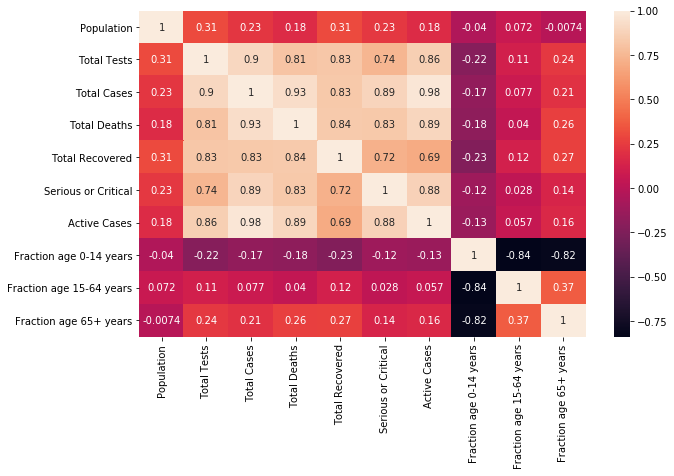

In [258]:
# checking the corelation through heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(ds3_df.corr(), annot=True)

In [259]:
# identifying the number columns
ds_int = ds3_df.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['Population', 'Total Tests', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Serious or Critical', 'Active Cases',
       'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

In [260]:
# identifying the category columns
ds_cat = ds3_df.select_dtypes(include=['object'])
ds_cat.columns

Index(['Date', 'Country'], dtype='object')

# Plotting outliers

univariate Analysis

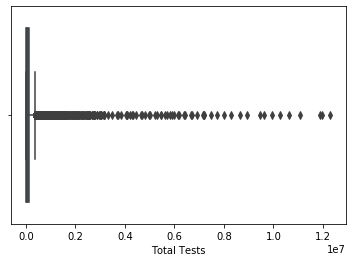

In [261]:
sns.boxplot(ds3_df['Total Tests'])
plt.show()

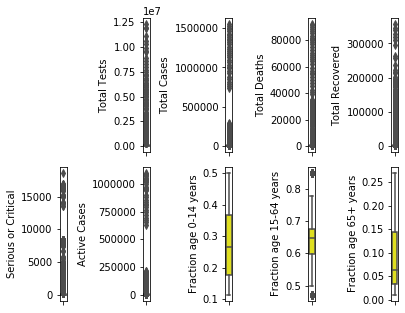

In [262]:
# Boxplot for all the columns
collist = ds_int.columns.values
nrows = 12
ncols = 5

plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds_int[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

# Histograms

<Figure size 864x1080 with 0 Axes>

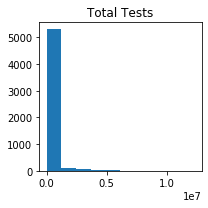

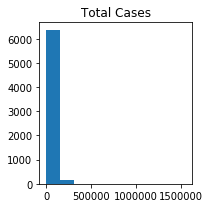

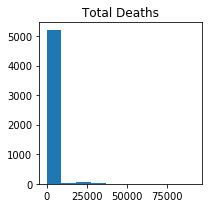

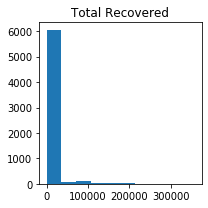

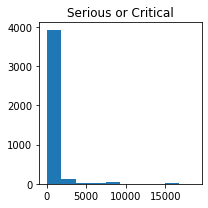

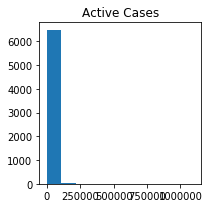

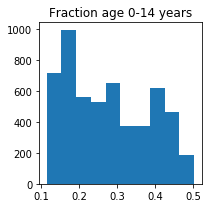

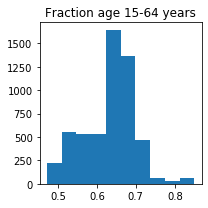

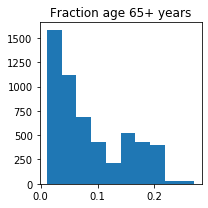

In [263]:
# Histogram for all the columns
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    plt.hist(ds_int[collist[i]])
    plt.tight_layout()

# Violinplot

<Figure size 864x1080 with 0 Axes>

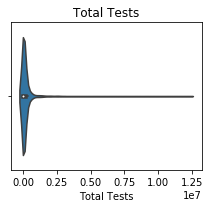

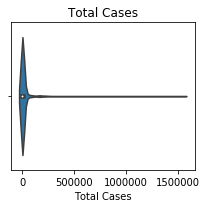

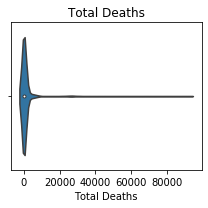

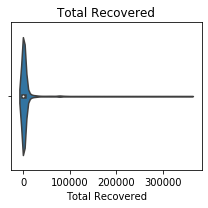

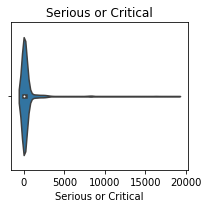

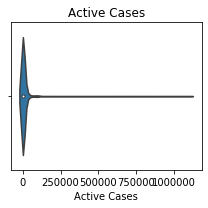

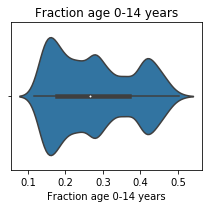

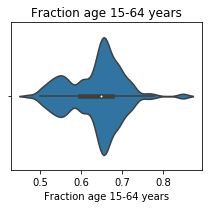

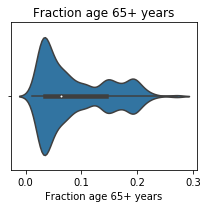

In [264]:
# Violinplot for all the columns
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    sns.violinplot(ds_int[collist[i]])
    plt.tight_layout()

# Distribution plots to check the skeweness of data

<Figure size 864x1080 with 0 Axes>

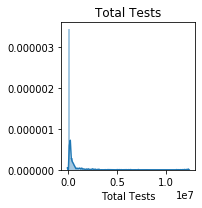

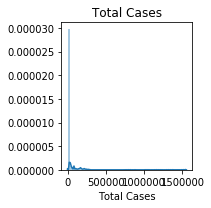

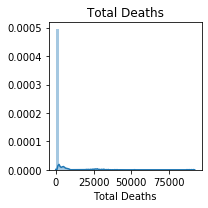

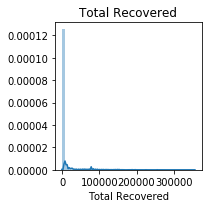

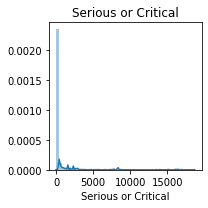

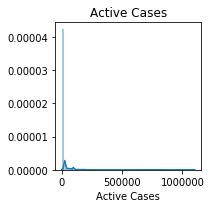

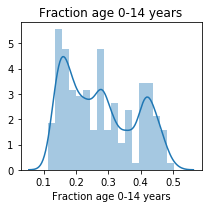

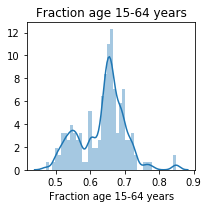

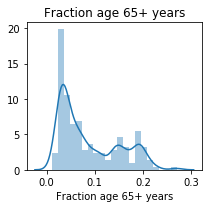

In [265]:
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    sns.distplot(ds_int[collist[i]])
    plt.tight_layout()

Bivariate Analysis

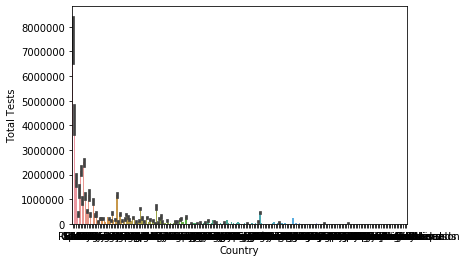

In [266]:
sns.barplot(x='Country', y='Total Tests' , data=ds3_df)
plt.show()

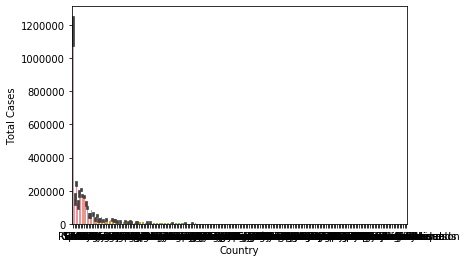

In [267]:
sns.barplot(x='Country', y='Total Cases' , data=ds3_df)
plt.show()

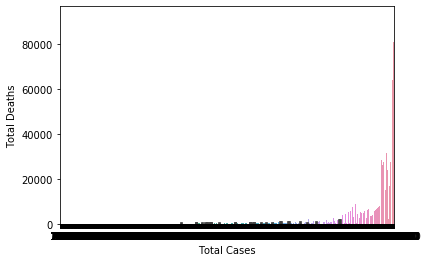

In [268]:
sns.barplot(x='Total Cases', y='Total Deaths' , data=ds3_df)
plt.show()

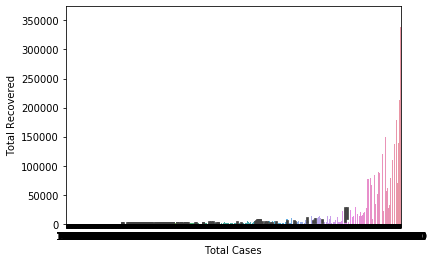

In [269]:
sns.barplot(x='Total Cases', y='Total Recovered' , data=ds3_df)
plt.show()

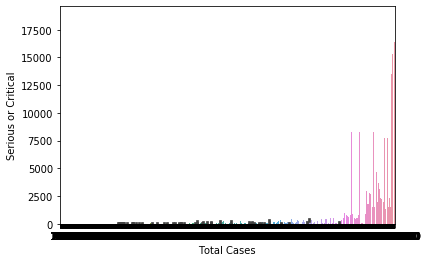

In [270]:
sns.barplot(x='Total Cases', y='Serious or Critical' , data=ds3_df)
plt.show()

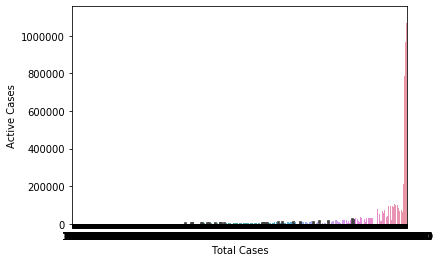

In [271]:
sns.barplot(x='Total Cases', y='Active Cases' , data=ds3_df)
plt.show()

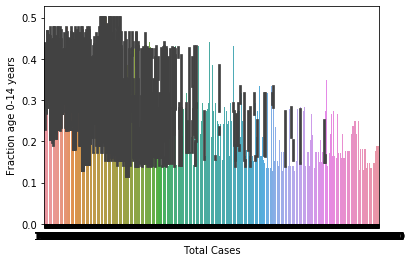

In [272]:
sns.barplot(x='Total Cases', y='Fraction age 0-14 years' , data=ds3_df)
plt.show()

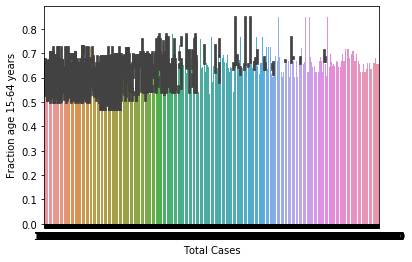

In [273]:
sns.barplot(x='Total Cases', y='Fraction age 15-64 years' , data=ds3_df)
plt.show()

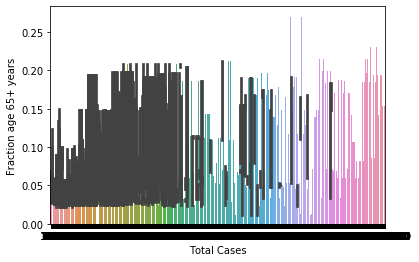

In [274]:
sns.barplot(x='Total Cases', y='Fraction age 65+ years' , data=ds3_df)
plt.show()

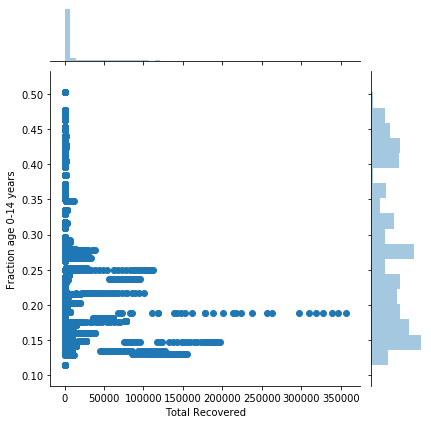

In [275]:
sns.jointplot(data=ds3_df, x="Total Recovered", y="Fraction age 0-14 years" )
plt.show()

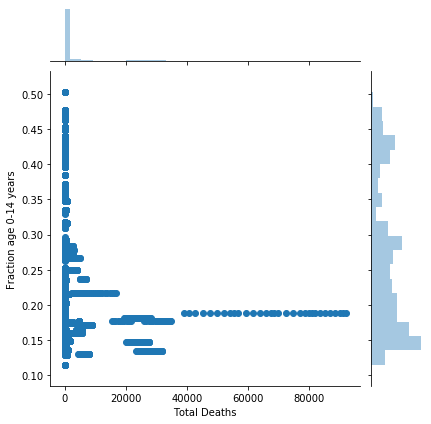

In [276]:
sns.jointplot(data=ds3_df, x="Total Deaths", y="Fraction age 0-14 years" )
plt.show()

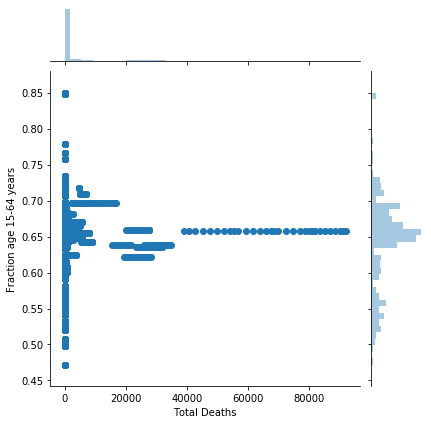

In [277]:
sns.jointplot(data=ds3_df, x="Total Deaths", y="Fraction age 15-64 years" )
plt.show()

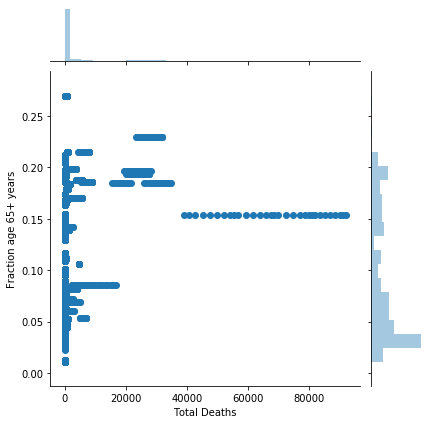

In [278]:
sns.jointplot(data=ds3_df, x="Total Deaths", y="Fraction age 65+ years" )
plt.show()

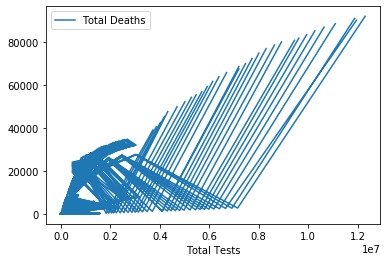

In [279]:
ds3_df.plot(x='Total Tests', y='Total Deaths', kind = 'line')
plt.show()

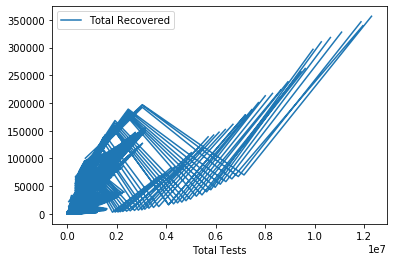

In [280]:
ds3_df.plot(x='Total Tests', y='Total Recovered', kind = 'line')
plt.show()

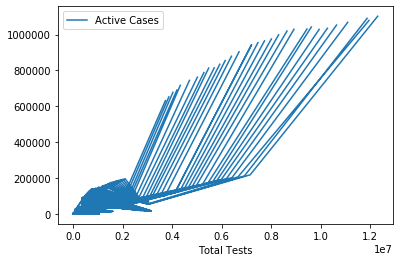

In [281]:
ds3_df.plot(x='Total Tests', y='Active Cases', kind = 'line')
plt.show()

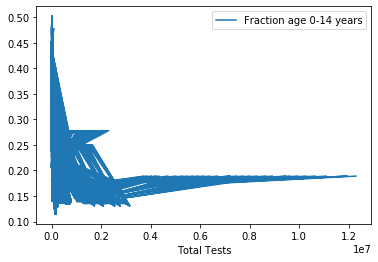

In [282]:
ds3_df.plot(x='Total Tests', y='Fraction age 0-14 years', kind = 'line')
plt.show()

In [283]:
#sns.stripplot(x='Total Cases', y='Total Deaths', data=ds3_df)
#plt.show()

In [284]:
#sns.stripplot(x='Total Recovered', y='Total Deaths', data=ds3_df)
#plt.show()

In [285]:
#sns.stripplot(x='Country', y='Total Deaths', data=ds3_df)
#plt.show()

In [286]:
#sns.stripplot(x='Country', y='Total Recovered', data=ds3_df)
#plt.show()

In [287]:
#sns.stripplot(x='Population', y='Total Recovered', data=ds3_df)
#plt.show()

In [288]:
#sns.stripplot(x='Population', y='Total Deaths', data=ds3_df)
#.show()

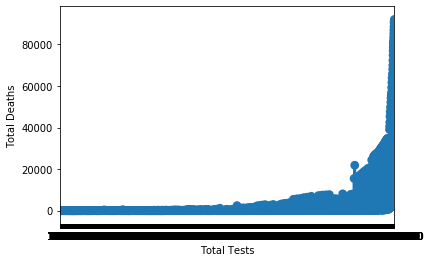

In [289]:
sns.pointplot(x='Total Tests', y='Total Deaths', data=ds3_df)
plt.show()

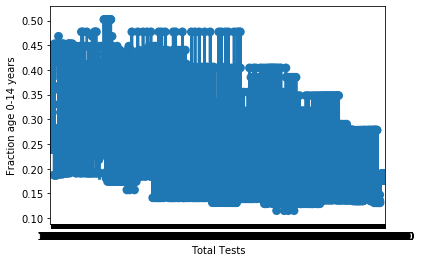

In [290]:
sns.pointplot(x='Total Tests', y='Fraction age 0-14 years', data=ds3_df)
plt.show()

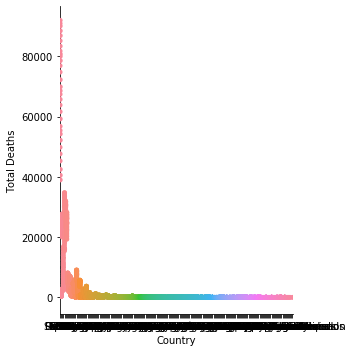

In [291]:
sns.catplot(x='Country', y='Total Deaths' ,data=ds3_df)
plt.show()

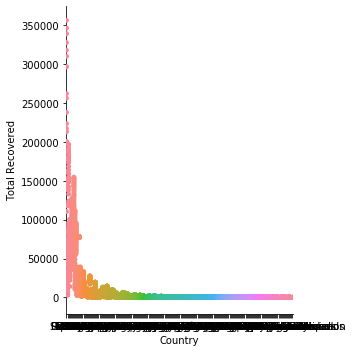

In [292]:
sns.catplot(x='Country', y='Total Recovered' ,data=ds3_df)
plt.show()

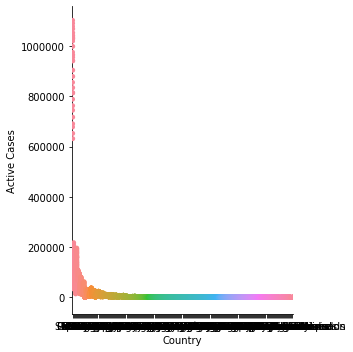

In [293]:
sns.catplot(x='Country', y='Active Cases' ,data=ds3_df)
plt.show()

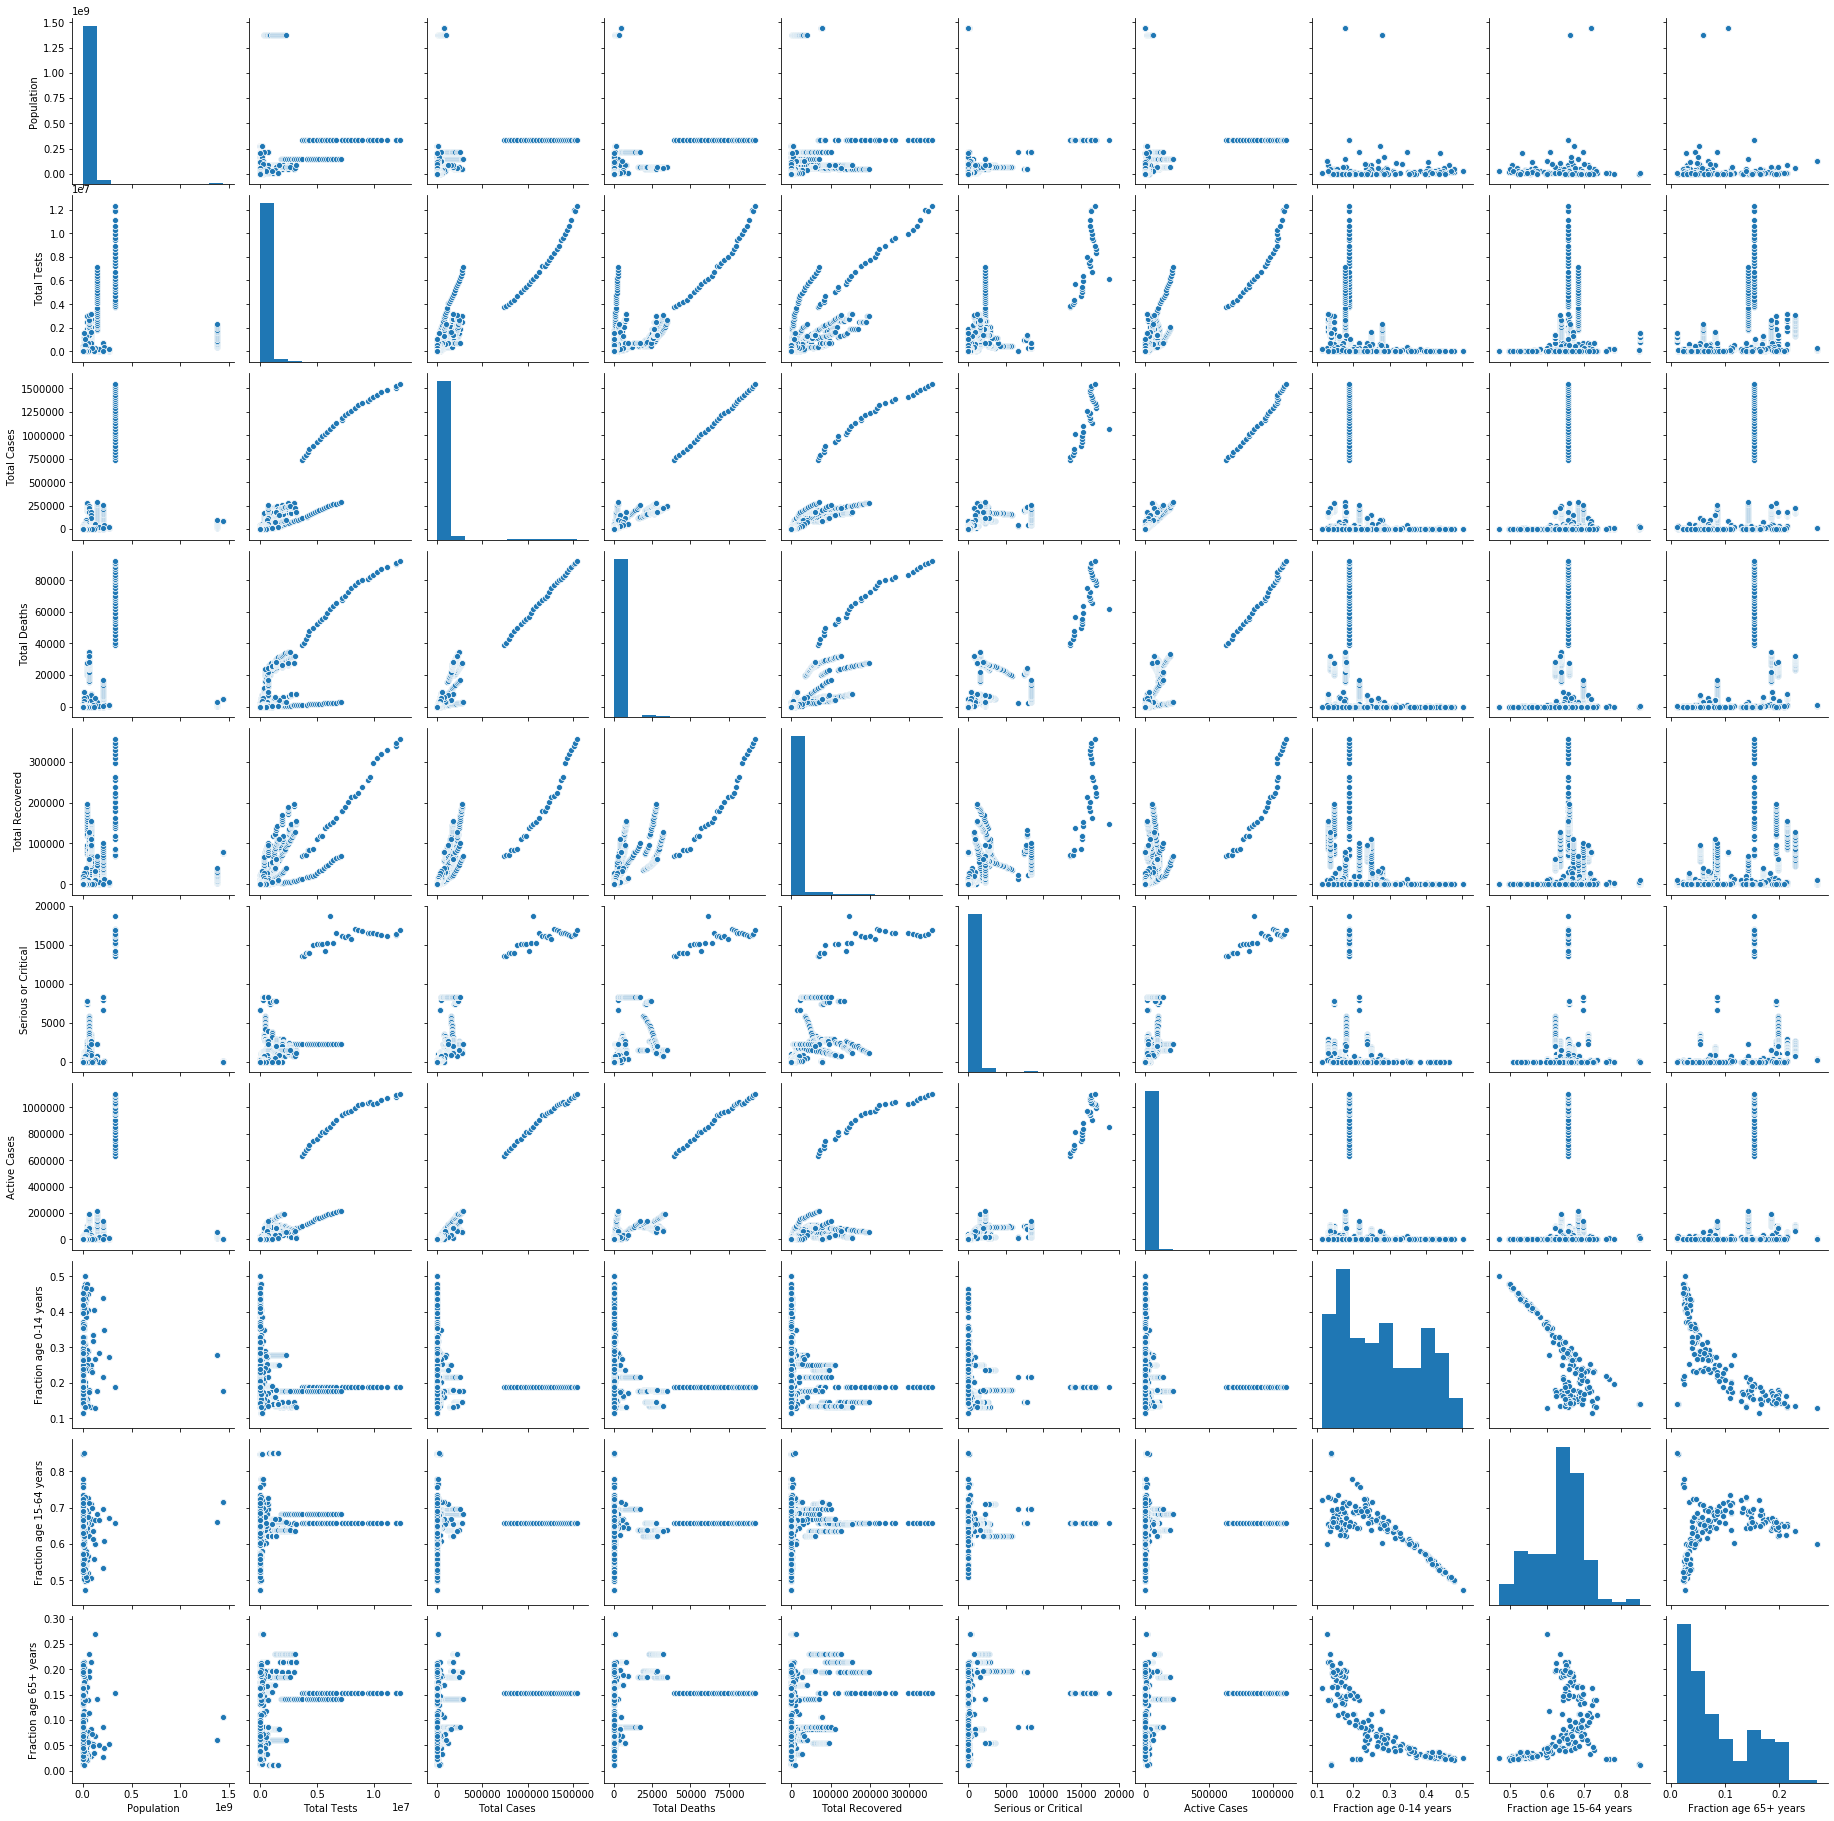

In [294]:
# Pairplot
sns.pairplot(ds3_df)
plt.show()

In [295]:
# using LabelEncoder to change categorical data to number data
le = LabelEncoder()
for i in ds_cat:
    ds3_df[i] = le.fit_transform(ds3_df[i].astype(str))

In [296]:
ds3_df.dtypes

Date                          int32
Country                       int32
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [297]:
# replacing NaN values with 0
ds3_df.replace(np.NaN, 0, inplace=True)

# Removing Outliers

In [298]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds3_df))
print ('Before removing zscore: ', ds3_df.shape)

ds_final = ds3_df.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (6603, 12)
After removing zscore:  (6241, 12)


# Regression analysis

In [299]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Total Deaths'])
y = ds_final['Total Deaths']

In [300]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [301]:
(x.shape, y.shape)

((6241, 11), (6241,))

In [302]:
# Checking the skewness of dada
x.skew()

Date                        0.008198
Country                    -0.012962
Population                  4.041762
Total Tests                 4.591328
Total Cases                 5.281303
Total Recovered             7.284848
Serious or Critical         9.598105
Active Cases                6.229197
Fraction age 0-14 years    -0.142600
Fraction age 15-64 years   -1.412307
Fraction age 65+ years      0.870037
dtype: float64

In [303]:
# Removing skewness of data
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [304]:
x.skew()

Date                        0.008198
Country                    -0.012962
Population                  1.131338
Total Tests                 1.172374
Total Cases                 1.232115
Total Recovered             1.435206
Serious or Critical         1.907534
Active Cases                1.174310
Fraction age 0-14 years    -0.142600
Fraction age 15-64 years   -1.412307
Fraction age 65+ years     -0.567110
dtype: float64

In [305]:
for i in range (1,3):
    # Removing skewness of data
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col])


In [306]:
x.skew()

Date                        0.008198
Country                    -0.012962
Population                  0.281713
Total Tests                 0.302018
Total Cases                 0.410051
Total Recovered             0.469811
Serious or Critical         0.319135
Active Cases                0.229223
Fraction age 0-14 years    -0.142600
Fraction age 15-64 years   -1.412307
Fraction age 65+ years     -0.567110
dtype: float64

In [307]:
x.replace(np.NaN,0, True)

# Functions for Regression

In [308]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [309]:
# lets use linear regression and check max_r2_score corresponding to different random states
lreg = LinearRegression()
def linear_scr (x, y):
    r_state = max_r2_score(lreg, x, y)  
    return r_state

In [310]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model
knr = KNeighborsRegressor()
def knr_best_param(x, y):
    neighbors ={'n_neighbors' : range(1, 42)}    
    gknr = GridSearchCV(knr, neighbors, cv=10)
    gknr.fit(x, y)
    k_best_param = gknr.best_params_
    return k_best_param

In [311]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
def get_maxscr_knn(x, y, k_n_nei):
    knr = KNeighborsRegressor(n_neighbors = k_n_nei)
    r_state = max_r2_score(knr, x, y)
    return r_state

In [312]:
# Lets check the mean r2 score of both linear regression model and knn regression
def get_lnr_knn_score(x, y): 
    print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
    print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
    print ("\n*****************\n")
    print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
    print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())
    return

In [313]:
lsreg = Lasso()
# Lets check Lasso Regression and find best value of alpha
def lasso_param(x, y):    
    parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
    clf = GridSearchCV(lsreg, parameters, cv=10)
    clf.fit(x, y)
    best_param = clf.best_params_
    return best_param

In [314]:
# Lets check max r2 score when we use Lasso

def lasso_state(x, y):    
    lsreg = Lasso(alpha=0.0001)
    r_state = max_r2_score (lsreg, x, y)
    return r_state

In [315]:
# Now we will use Gradient Boosting technique 
# For getting best set of params

gbr = GradientBoostingRegressor()
def grdnt_param(x,y):    
    parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100,150, 200, 250, 300]}
    clf = GridSearchCV(gbr, parameters, cv=5)
    clf.fit(x,y)
    best_param = clf.best_params_
    return best_param

In [316]:
# Now we will use cross val score to check the mean r2 score and standard deviation
def grdnt_score(x,y, g_lrn_rt, g_n_est):
    gbr = GradientBoostingRegressor(learning_rate= g_lrn_rt, n_estimators= g_n_est)
    print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
    print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())
    return

In [317]:
ada_reg = AdaBoostRegressor()
# Now Lets use AdaBostRegression algorithm 
def adbr_best_param(x, y):
    
    parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 150, 200, 250, 300], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor()]}
    clf = GridSearchCV (ada_reg, parameters, cv=5)
    clf.fit(x,y)
    a_best_param = clf.best_params_
    return a_best_param

In [318]:
# Lets create the object of AdaBoost Regression n check the scores
def adbr_scr(x, y, a_base_est, a_lrn_rt, a_n_est):
    
    ada_reg = AdaBoostRegressor(base_estimator = a_base_est, learning_rate=a_lrn_rt, n_estimators=a_n_est)
    print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
    print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())
    return

In [319]:
def save_pred_csv(y_pred, file_name):                  
    dft = pd.DataFrame(y_pred)
    dft.to_csv (file_name)
    return

In [320]:
# Lets find RMSE and r2 score using sklearn.metrics

def cal_scr(y_test, y_pred):
    print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print ('r2 score is: ', r2_score(y_test, y_pred))
    return

In [321]:
# saving the model 

def save_model (obj, file_name, x_test):
    
    joblib.dump(obj, file_name)
    #clf = joblib.load(file_name)
    #print (clf.predict(x_test))
    return

# Calling the functions for Regression

In [322]:
# lets use linear regression and check max_r2_score corresponding to different random states
r_state = linear_scr(x,y)
print ('\n Random state for linear regression : \n', r_state)


Max r2 score corresponding to  57  is:  0.4607734044011612

 Random state for linear regression : 
 57


In [323]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model
k_best_param = knr_best_param (x, y)
print ('\n Best params for KNN regression : \n', k_best_param)

k_n_nei =k_best_param['n_neighbors']
print('\n Best params for KNN n_neighbors: \n', k_n_nei)

 # Lets use KNN regression and check max r2 score corresponding to different random states
r_state = get_maxscr_knn(x, y, k_n_nei)
print ('\n Random state for KNN regression : \n', r_state)

# Checking the scores
get_lnr_knn_score(x,y)


 Best params for KNN regression : 
 {'n_neighbors': 2}

 Best params for KNN n_neighbors: 
 2

Max r2 score corresponding to  85  is:  0.9996023282892263

 Random state for KNN regression : 
 85
Mean r2 score for linear regression:  0.3935886966782878
Standard deviation for r2 score in linear regression:  0.05398564797724609

*****************

Mean r2 score for KNN regression:  0.8570857086550326
Standard deviation for r2 score in KNN regression:  0.2195355238883256


In [324]:
# Lets check Lasso Regression and find best value of alpha

l_best_param = lasso_param(x,y)
print ('\n Best params dfor lasso regression:\n', l_best_param)

# Lets check max r2 score when we use Lasso
r_state = lasso_state(x, y)
print ('\n Random state for Lasso Regression: \n', r_state)



 Best params dfor lasso regression:
 {'alpha': 1}

Max r2 score corresponding to  57  is:  0.4607740782956511

 Random state for Lasso Regression: 
 57


In [325]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 
g_best_param = grdnt_param(x,y)
print ('\n Best params for gradientboost regressor: \n', g_best_param)

g_lrn_rt = g_best_param['learning_rate']
g_n_est = g_best_param['n_estimators']

print ('\n Best params for gradientboost regressor: \n', ' learning_rate: ', g_lrn_rt, ' n_estimators: ', g_n_est)

# Now we will use cross val score to check the mean r2 score and standard deviation
grdnt_score(x,y, g_lrn_rt, g_n_est)

# lets check maximum r2 score correspondithisng to 
r_state = max_r2_score(gbr, x, y)
print('\n\n')


 Best params for gradientboost regressor: 
 {'learning_rate': 0.1, 'n_estimators': 150}

 Best params for gradientboost regressor: 
  learning_rate:  0.1  n_estimators:  150
Mean r2 score for Gradient Boosting Regression:  0.8637421937299411
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.20337219535699125

Max r2 score corresponding to  52  is:  0.9946575008392137





In [326]:
# Now Lets use AdaBostRegression algorithm 
a_best_param = adbr_best_param(x,y)
print ('\n Best params for AdaBoostRegressor : \n', a_best_param)

a_base_est = a_best_param['base_estimator']
a_lrn_rt = a_best_param['learning_rate']
a_n_est = a_best_param['n_estimators']

print ('\n base_estimator learning_rate n_estimators : \n',a_base_est , a_lrn_rt, a_n_est)



 Best params for AdaBoostRegressor : 
 {'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 1, 'n_estimators': 100}

 base_estimator learning_rate n_estimators : 
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 1 100


In [327]:
# Lets create the object of AdaBoost Regression n check the scores
adbr_scr(x, y, a_base_est, a_lrn_rt, a_n_est)

Mean r2 score for Ada Boosting Regression:  0.8948282540911968
Standard Deviation in  r2 score for Ada Boosting Regression:  0.15427575788647116


In [328]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  68  is:  0.9653387408407926


In [329]:
# we tried all the models and till now and best model will be selected
# random state corresponding to highest r2 score is 81

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=82, test_size = 0.20)
gbr = GradientBoostingRegressor(learning_rate= g_lrn_rt, n_estimators= g_n_est)
gbr.fit(x_train, y_train)
y_pred =  gbr.predict(x_test)
print (y_pred)

[ 9.9739351   8.59302641 42.45096011 ... 15.22878309 92.63100745
 10.92930446]


In [330]:
# Saving the predicted values in the csv file
save_pred_csv(y_pred, 'pred_covid.csv')

#Calculating the RMSE and R2 score for best model
cal_scr(y_test, y_pred)

# Saving the best model
save_model(gbr, 'Project_Covid.pkl', x_test)

RMSE is:  60.339639302929804
r2 score is:  0.9960782416025702
